##Estudiando los datos

In [ ]:
import pandas as pd
import polars as pl


In [ ]:
# datos = pd.read_parquet("/content/flights2015.parquet")#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_parquet("/content/drive/MyDrive/HACKATHON/ARCHIVOS 2015/flights2015.parquet")

In [ ]:
datos["ORIGIN_AIRPORT"] = datos["ORIGIN_AIRPORT"].astype(str) # Forzar columna a string

cols_airports = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"] # Forzar columnas de aeropuertos a texto

for col in cols_airports:
    datos[col] = datos[col].astype(str)




In [ ]:
datos.to_parquet("/content/drive/MyDrive/HACKATHON/ARCHIVOS 2015/flights2015.parquet", engine="pyarrow", index=False)
# Guardar como Parquet


In [ ]:
# Diccionario de traducción de columnas
columnas_es = {
    "YEAR": "AÑO",
    "MONTH": "MES",
    "DAY": "DÍA",
    "DAY_OF_WEEK": "DÍA_SEMANA",
    "AIRLINE":"AEROLÍNEA",
    "FLIGHT_NUMBER": "NÚMERO_VUELO",
    "TAIL_NUMBER":"NÚMERO_DEL_AVIÓN",
    "ORIGIN_AIRPORT":"AEROPUERTO_ORIGEN",
    "DESTINATION_AIRPORT":"AEROPUERTO_DESTINO",
    "SCHEDULED_DEPARTURE": "SALIDA_PROGRAMADA",
    "DEPARTURE_TIME": "HORA_SALIDA",
    "DEPARTURE_DELAY": "RETRASO_SALIDA",
    "TAXI_OUT": "RODAJE_SALIDA",
    "WHEELS_ON":"ATERRIZAJE",
    "TAXI_IN":"RODAJE_LLEGADA",
    "WHEELS_OFF": "DESPEGUE",
    "SCHEDULED_ARRIVAL": "LLEGADA_PROGRAMADA",
    "ARRIVAL_TIME": "HORA_LLEGADA",
    "ARRIVAL_DELAY": "RETRASO_LLEGADA",
    "DIVERTED": "DESVIADO",
    "CANCELLED": "CANCELADO",
    "AIR_SYSTEM_DELAY": "RETRASO_SISTEMA_AÉREO",
    "SECURITY_DELAY": "RETRASO_SEGURIDAD",
    "AIRLINE_DELAY": "RETRASO_AEROLÍNEA",
    "LATE_AIRCRAFT_DELAY": "RETRASO_AVIÓN_TARDÍO",
    "WEATHER_DELAY": "RETRASO_CLIMA",
    "SCHEDULED_TIME":"TIEMPO_PROGRAMADO",
    "ELAPSED_TIME":"TIEMPO_TOTAL_REAL",
    "AIR_TIME":"TIEMPO_EN_AIRE",
    "DISTANCE":"DISTANCIA",
    "CANCELLATION_REASON":"RAZÓN_CANCELACIÓN"

}

# Aplicar la traducción
datos = datos.rename(columns=columnas_es)

# Verificar
print(datos.columns)

Index(['AÑO', 'MES', 'DÍA', 'DÍA_SEMANA', 'AEROLÍNEA', 'NÚMERO_VUELO',
       'NÚMERO_DEL_AVIÓN', 'AEROPUERTO_ORIGEN', 'AEROPUERTO_DESTINO',
       'SALIDA_PROGRAMADA', 'HORA_SALIDA', 'RETRASO_SALIDA', 'RODAJE_SALIDA',
       'DESPEGUE', 'TIEMPO_PROGRAMADO', 'TIEMPO_TOTAL_REAL', 'TIEMPO_EN_AIRE',
       'DISTANCIA', 'ATERRIZAJE', 'RODAJE_LLEGADA', 'LLEGADA_PROGRAMADA',
       'HORA_LLEGADA', 'RETRASO_LLEGADA', 'DESVIADO', 'CANCELADO',
       'RAZÓN_CANCELACIÓN', 'RETRASO_SISTEMA_AÉREO', 'RETRASO_SEGURIDAD',
       'RETRASO_AEROLÍNEA', 'RETRASO_AVIÓN_TARDÍO', 'RETRASO_CLIMA'],
      dtype='object')


In [ ]:
# TRANSFORMACIÓN DE UNIDADES MILLAS A KM #
datos['DISTANCIA'] = datos['DISTANCIA'] * 1.60934



In [ ]:
# Optimizar tipos
datos['AÑO'] = datos['AÑO'].astype('int16')
datos['MES'] = datos['MES'].astype('int8')
datos['DÍA'] = datos['DÍA'].astype('int8')
datos['DÍA_SEMANA'] = datos['DÍA_SEMANA'].astype('int8')
datos['AEROLÍNEA'] = datos['AEROLÍNEA'].astype('category')


In [ ]:
# "No Cancelado" indica que el vuelo no fue cancelado.#
#  0=indica que no hubo retraso por esa causa.#


datos = datos.fillna({
    'RAZÓN_CANCELACIÓN': 'No Cancelado',
    'RETRASO_SISTEMA_AÉREO': 0,
    'RETRASO_SEGURIDAD': 0,
    'RETRASO_AEROLÍNEA': 0,
    'RETRASO_AVIÓN_TARDÍO': 0,
    'RETRASO_CLIMA': 0
})

In [ ]:
# Vuelos cancelados (A, B, C, D)
cancelados = datos[datos['RAZÓN_CANCELACIÓN'] != 'No Cancelado']

# Vuelos realizados
realizados = datos[datos['RAZÓN_CANCELACIÓN'] == 'No Cancelado']

✅ Por qué hacerlo
- Modelos predictivos:
- Si el objetivo es predecir retrasos en vuelos que sí se realizaron, entrenar solo con realizados.
- Los cancelados se pueden analizar aparte (ej. distribución de motivos A, B, C, D).
- Análisis descriptivo:
- Calcular métricas de puntualidad en realizados.
- Y en paralelo, estudiar causas de cancelación en cancelados.


In [ ]:
for col in ['RETRASO_SALIDA','RETRASO_LLEGADA','TIEMPO_TOTAL_REAL',
            'TIEMPO_EN_AIRE','RODAJE_SALIDA','RODAJE_LLEGADA']:
    datos[col] = datos[col].astype('category')
    datos[col] = datos[col].cat.add_categories(['No Aplica'])
    datos[col] = datos[col].fillna('No Aplica')

In [ ]:
import pandas as pd

# Transformar minutos a hora decimal
datos['HORA_SALIDA'] = datos['HORA_SALIDA'] / 60
datos['HORA_LLEGADA'] = datos['HORA_LLEGADA'] / 60
datos['SALIDA_PROGRAMADA'] = datos['SALIDA_PROGRAMADA'] / 60
datos['LLEGADA_PROGRAMA'] = datos['LLEGADA_PROGRAMADA'] / 60

📊 **Estrategia práctica**
- Horas del día → hora decimal (para análisis de patrones diarios).
- Retrasos → minutos (para análisis de magnitud y frecuencia).
- Duraciones largas → horas (ej. vuelos de más de 120 min, puedes convertirlos a horas para comunicar mejor).


In [ ]:
datos.head(5)

,AÑO,MES,DÍA,DÍA_SEMANA,AEROLÍNEA,NÚMERO_VUELO,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,SALIDA_PROGRAMADA,...,RETRASO_LLEGADA,DESVIADO,CANCELADO,RAZÓN_CANCELACIÓN,RETRASO_SISTEMA_AÉREO,RETRASO_SEGURIDAD,RETRASO_AEROLÍNEA,RETRASO_AVIÓN_TARDÍO,RETRASO_CLIMA,LLEGADA_PROGRAMA
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0.083333,...,-22.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,7.166667
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0.166667,...,-9.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,12.500000
2,2015,1,1,4,US,840,N171US,SFO,CLT,0.333333,...,5.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.433333
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0.333333,...,-9.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.416667
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0.416667,...,-21.0,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,5.333333


📊 **DESCRIPCIÓN DE COLUMNAS**
| NOMBRE |DESCRIPCIÓN                                          |
|--------|-----------------------------------------------------|
| AÑO    |  Año en que se realizó o estaba programado el vuelo.|
|MES  | Mes del vuelo (1 = enero, 12 = diciembre). |
|DÍA  | Día del mes en que ocurrió el vuelo. |
|DÍA_SEMANA  | Día de la semana (1 = lunes, 7 = domingo). |
| AEROLÍNEA |  Código de la aerolínea que opera el vuelo (ej. AA = American Airlines, WN = Southwest).|
|NÚMERO_VUELO  | Número de vuelo asignado por la aerolínea. |
| NÚMERO_DEL_AVIÓN  | Matrícula única del avión, como la “placa” de un automóvil (ej. N485HA). |
| AEROPUERTO_ORIGEN | Código IATA del aeropuerto desde donde despega el vuelo. |
| AEROPUERTO_DESTINO | Código IATA del aeropuerto donde aterriza el vuelo. |
| SALIDA_PROGRAMADA | Hora programada de salida (formato HHMM). |
| HORA_LLEGADA | Hora real en que el avión llegó al aeropuerto destino. |
|HORA_SALIDA | Hora real en que el avión sale del aeropuerto origen. |
| RETRASO_LLEGADA | Diferencia en minutos entre la hora real de llegada y la programada (positivo = retraso, negativo = adelantado). |
|DESVIADO  | Indica si el vuelo fue desviado a otro aeropuerto (1 = sí, 0 = no). |
|CANCELADO  | Indica si el vuelo fue cancelado (1 = sí, 0 = no). |
| RAZÓN_CANCELACIÓN |Motivo de cancelación: A = sistema aéreo, B = seguridad, C = aerolínea, D = clima.  |
| RETRASO_SISTEMA_AÉREO |Minutos de retraso atribuibles al sistema aéreo (congestión, control de tráfico aéreo).
|RETRASO_SEGURIDAD  |Minutos de retraso por controles o incidentes de seguridad.  |
| RETRASO_AEROLÍNEA | Minutos de retraso atribuibles a la aerolínea (tripulación, mantenimiento, logística interna). |
|RETRASO_AVIÓN_TARDÍO  | Minutos de retraso porque el avión llegó tarde de un vuelo anterior (efecto cascada). |
| RETRASO_CLIMA | Minutos de retraso por condiciones meteorológicas adversas (tormentas, nieve, niebla, viento). |
|TIEMPO_PROGRAMADO|Es la duración estimada del vuelo según el plan de la aerolínea (en minutos)|
|TIEMPO_TOTAL_REAL|Es el tiempo que realmente tomó el vuelo desde la salida hasta la llegada, incluyendo rodaje de salida y rodaje de entrada.|
|TIEMPO_EN_AIRE|Es el tiempo que el avión estuvo efectivamente volando, desde el despegue hasta el aterrizaje.|
|DISTANCIA|Registra la distancia de los vuelos en kilómetros|







In [ ]:
datos.shape

(5819079, 32)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   AÑO                    int16   
 1   MES                    int8    
 2   DÍA                    int8    
 3   DÍA_SEMANA             int8    
 4   AEROLÍNEA              category
 5   NÚMERO_VUELO           int64   
 6   NÚMERO_DEL_AVIÓN       object  
 7   AEROPUERTO_ORIGEN      object  
 8   AEROPUERTO_DESTINO     object  
 9   SALIDA_PROGRAMADA      float64 
 10  HORA_SALIDA            float64 
 11  RETRASO_SALIDA         category
 12  RODAJE_SALIDA          category
 13  DESPEGUE               float64 
 14  TIEMPO_PROGRAMADO      float64 
 15  TIEMPO_TOTAL_REAL      category
 16  TIEMPO_EN_AIRE         category
 17  DISTANCIA              float64 
 18  ATERRIZAJE             float64 
 19  RODAJE_LLEGADA         category
 20  LLEGADA_PROGRAMADA     int64   
 21  HORA_LLEGADA           float64 

In [ ]:
datos.sort_values(by="AEROLÍNEA").describe(include="O") #Generación de estadísticas de columnas categóricas o de texto##


,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,RAZÓN_CANCELACIÓN
count,5804358,5819079,5819079,5819079
unique,4897,628,629,5
top,N480HA,ATL,ATL,No Cancelado
freq,3768,346836,346904,5729195


🔎 Lectura de cada columna
- AEROLÍNEA
- Total de registros: 5,819,079.
- Hay 14 aerolíneas distintas.
- La más frecuente es WN (Southwest Airlines) con 1,261,855 vuelos.
👉 Esto muestra que el dataset está dominado por una aerolínea en particular.
- NÚMERO_DEL_AVIÓN
- Registros no nulos: 5,804,358 (hay algunos faltantes).
- Hay 4,897 aviones distintos.
- El avión más frecuente es N480HA, con 3,768 vuelos.
👉 Algunos aviones vuelan muchas veces, lo que puede ser útil para analizar mantenimiento o patrones de retraso.
- AEROPUERTO_ORIGEN
- Total de registros: 5,819,079.
- Hay 628 aeropuertos distintos de origen.
- El más frecuente es ATL (Atlanta) con 346,836 vuelos saliendo de allí.
👉 ATL es un hub clave en tu dataset.
- AEROPUERTO_DESTINO
- Total de registros: 5,819,079.
- Hay 629 aeropuertos distintos de destino.
- El más frecuente también es ATL (Atlanta) con 346,904 vuelos llegando allí.
👉 ATL aparece como origen y destino principal, confirmando su rol de mega-hub.
- RAZÓN_CANCELACIÓN
- Total de registros: 5,819,079.
- Hay 5 categorías distintas (ej. clima, seguridad, aerolínea, avión tardío, y “No Cancelado”).
- El valor más frecuente es “No Cancelado”, con 5,729,195 vuelos.
👉 La gran mayoría de vuelos no fueron cancelados, lo que es esperable.

✨ Interpretación general
- El dataset es muy grande (5.8 millones de vuelos).
- Está dominado por una aerolínea (WN) y por un aeropuerto (ATL).
- La mayoría de vuelos no están cancelados, lo que genera un desbalance de clases si quisieras modelar cancelaciones.
- El campo NÚMERO_DEL_AVIÓN muestra que algunos aviones vuelan miles de veces, lo que puede ser útil para análisis longitudinales.



In [ ]:
datos['RAZÓN_CANCELACIÓN'].value_counts()

,count
RAZÓN_CANCELACIÓN,
No Cancelado,5729195
B,48851
A,25262
C,15749
D,22


In [ ]:
Número_vuelos_cancelados = datos['RAZÓN_CANCELACIÓN'].isin(["A","B","C","D"])
Número_vuelos_cancelados.sum()

np.int64(89884)

📊 **Qué significa unique = 4 en CANCELLATION_REASON**
- Se refiere 4 categorías oficiales de motivo de cancelación que usa el dataset del DOT/FAA en EE.UU.
- Los códigos son:
>- A → RETRASO_SISTEMA_AÉREO (problemas del sistema aéreo: control de tráfico, congestión).
>- B → RETRASO_SEGURIDAD (temas de seguridad).
>- C → RETRASO_AEROLÍNEA (problemas internos de la aerolínea: tripulación, mantenimiento).
>- D → RETRASO_CLIMA (clima).


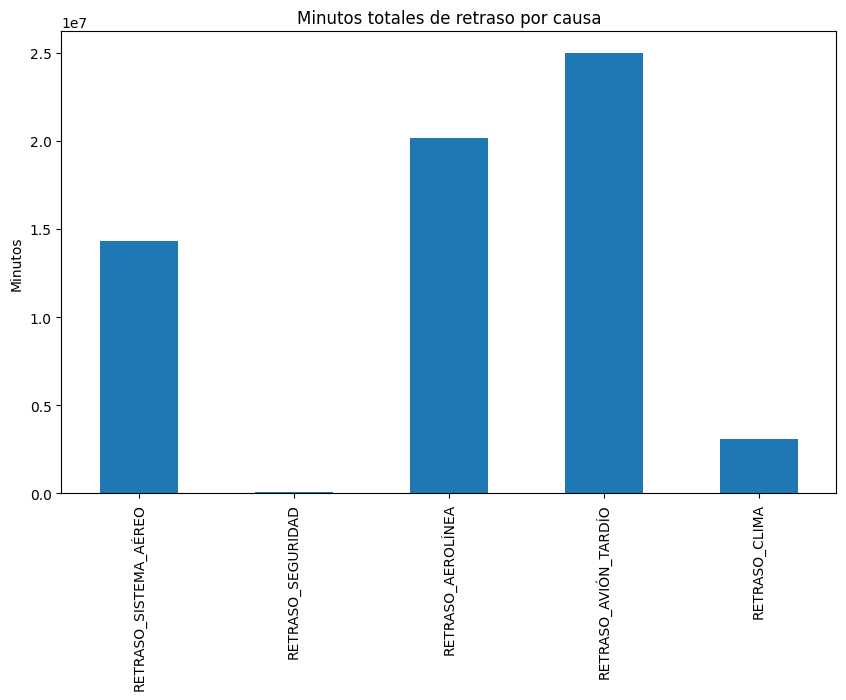

In [ ]:
import matplotlib.pyplot as plt

causas = ['RETRASO_SISTEMA_AÉREO','RETRASO_SEGURIDAD',
          'RETRASO_AEROLÍNEA','RETRASO_AVIÓN_TARDÍO','RETRASO_CLIMA']

datos[causas].sum().plot(kind='bar', figsize=(10,6))
plt.title("Minutos totales de retraso por causa")
plt.ylabel("Minutos")
plt.show()

📊 **Comparación de magnitudes**
| Categoría de retraso | Rango en minutos | Interpretación |
|----------------------|------------------|----------------|
|Puntualidad aceptada  | 0–15 | Normal, sin impacto significativo |
|Retraso leve  |16–30  | Aún tolerable, frecuente en operaciones |
|Retraso moderado  |31–60  | Ya afecta conexiones y logística |
| Retraso grave |  >60| Impacto fuerte en pasajeros y aerolínea |
|Retraso extremo|>180|Casos excepcionales, suelen implicar compensaciones|






🔄 **Relación entre variable que explican el RETRASO_AVIÓN_TARDÍO.**

- Un RETRASO_LLEGADA positivo puede provocar que el avión llegue tarde al aeropuerto de origen.
- Ese mismo avión necesita tiempo para desembarcar pasajeros, cargar combustible, embarcar nuevos pasajeros y realizar rodaje, puede generar un RETRASO_SALIDA positivo en su siguiente vuelo desde el aeropuerto de origen.
- Es el famoso efecto cascada (RETRASO_AVIÓN_TARDÍO): un retraso en llegada se transmite como retraso en salida.


🔎 **Ejemplo práctico**
Imagina un avión que debía salir a las 10:00:
- **Llega a la puerta a las 09:50, pero por problemas de embarque sale a las 10:20 →**
>- RETRASO_SALIDA = 20 min
>- RETRASO_AVIÓN_TARDÍO = 0 min (porque el avión estaba a tiempo, el retraso fue por otra causa).
- **Llega a la puerta a las 10:30 porque venía atrasado de otro vuelo →**
>- RETRASO_SALIDA = 30 min
>- RETRASO_AVIÓN_TARDÍO = 30 min (el retraso de salida se explica totalmente por la llegada tardía).
- **Llega a las 10:20 y además hay problemas de embarque hasta las 10:40 →**
>- RETRASO_SALIDA = 40 min
>- RETRASO_AVIÓN_TARDÍO = 20 min (solo parte del retraso se debe al avión tardío).


**Ahora, conceptualmente:**

- **RETRASO_AVIÓN_TARDÍO** no es una causa primaria, sino más bien un efecto acumulado.
- Se refiere a los minutos de retraso que un vuelo hereda porque el avión llegó tarde de un vuelo anterior.
- Ese retraso puede estar explicado por cualquiera de las otras causas:
- **RETRASO_CLIMA** → si el vuelo anterior se demoró por tormenta.
- **RETRASO_AEROLÍNEA** → si hubo problemas operativos o logísticos.
- **RETRASO_SISTEMA_AÉREO** → congestión en el tráfico aéreo.
- **RETRASO_SEGURIDAD** → inspecciones adicionales.

👉 En otras palabras: todos esos retrasos pueden alimentar el retraso del avión tardío, porque si un vuelo se demora por cualquiera de esas razones, el avión llega tarde y arrastra el retraso al siguiente vuelo.


 ## **Paso 1: Importar librería**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

#**🧮 Paso 1: Crear la variable franja_horaria**

In [ ]:
def categorizar_hora(hora):
    if pd.isna(hora): # Handle NaN values
        return 'Desconocida' # Or any other appropriate placeholder
    if hora >= 0 and hora < 6:
        return 'Madrugada'
    elif hora >= 6 and hora < 12:
        return 'Mañana'
    elif hora >= 12 and hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Antes de aplicar la función, asegúrate de que HORA_SALIDA no tenga NaNs
# Rellenar NaNs con la mediana es una estrategia común para datos numéricos
datos['HORA_SALIDA'] = datos['HORA_SALIDA'].fillna(datos['HORA_SALIDA'].median())

# Aplicar la función
datos['franja_horaria'] = datos['HORA_SALIDA'].apply(categorizar_hora)
datos

,AÑO,MES,DÍA,DÍA_SEMANA,AEROLÍNEA,NÚMERO_VUELO,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,SALIDA_PROGRAMADA,...,DESVIADO,CANCELADO,RAZÓN_CANCELACIÓN,RETRASO_SISTEMA_AÉREO,RETRASO_SEGURIDAD,RETRASO_AEROLÍNEA,RETRASO_AVIÓN_TARDÍO,RETRASO_CLIMA,LLEGADA_PROGRAMA,franja_horaria
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0.083333,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,7.166667,Noche
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0.166667,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,12.500000,Madrugada
2,2015,1,1,4,US,840,N171US,SFO,CLT,0.333333,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.433333,Madrugada
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0.333333,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.416667,Madrugada
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0.416667,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,5.333333,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,39.316667,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.650000,Noche
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,39.316667,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,7.433333,Noche
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,39.316667,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,7.333333,Noche
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,39.316667,...,0,0,No Cancelado,0.0,0.0,0.0,0.0,0.0,5.666667,Noche


/tmp/ipython-input-287751444.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='franja_horaria', y='RETRASO_GRAVE', data=proporciones, palette='viridis')


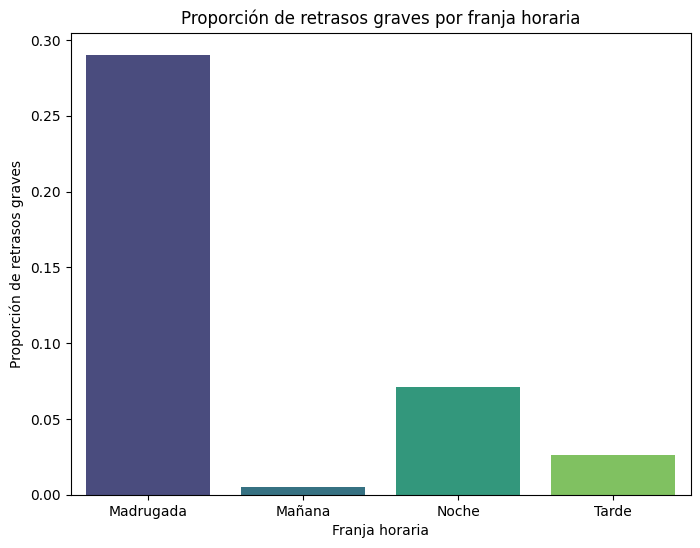

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, ensure 'RETRASO_LLEGADA' is numeric and handle potential 'No Aplica' values
datos['RETRASO_LLEGADA'] = pd.to_numeric(datos['RETRASO_LLEGADA'], errors='coerce')

# Define 'RETRASO_GRAVE' based on a delay greater than 60 minutes
# Assuming 'RETRASO_GRAVE' refers to arrival delay, or you might want to combine arrival/departure delays
# For this example, let's use RETRASO_LLEGADA > 60 as defined in the description
# We will also fill NaN values in RETRASO_LLEGADA that might have resulted from 'No Aplica' after converting to numeric
# Let's consider 0 for flights that didn't have a numeric delay or were 'No Aplica'
datos['RETRASO_LLEGADA'] = datos['RETRASO_LLEGADA'].fillna(0)
datos['RETRASO_GRAVE'] = (datos['RETRASO_LLEGADA'] > 60).astype(int) # 1 if grave, 0 otherwise

# Calcular proporción de retrasos graves por franja
proporciones = datos.groupby('franja_horaria')['RETRASO_GRAVE'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x='franja_horaria', y='RETRASO_GRAVE', data=proporciones, palette='viridis')
plt.title("Proporción de retrasos graves por franja horaria")
plt.ylabel("Proporción de retrasos graves")
plt.xlabel("Franja horaria")
plt.show()

#**🧠 Paso 2: Definir variables explicativas y objetivo**

In [ ]:
X = datos[['HORA_SALIDA', 'RETRASO_AVIÓN_TARDÍO', 'DÍA_SEMANA', 'AEROLÍNEA', 'franja_horaria']]
y = datos['RETRASO_GRAVE']

#**🧼 Paso 3: One-hot encoding para variables categóricas**

In [ ]:
X = pd.get_dummies(X, columns=['DÍA_SEMANA', 'AEROLÍNEA', 'franja_horaria'], drop_first=True)

#**🔀 Paso 4: Separar datos en entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#**🧪 Paso 5: Estrategias para mejorar el recall de “Retraso Grave**

1. Rebalancear las clases
- Oversampling (duplicar casos minoritarios) con SMOTE:
- Undersampling (reducir casos mayoritarios) para equilibrar.

2. Usar class_weight
En RandomForest y GradientBoosting puedes penalizar más los errores en la clase minoritaria:

3. Cambiar la métrica de optimización
- En lugar de optimizar accuracy, optimiza recall o F1-score de la clase minoritaria.
- Usa scoring="recall" o scoring="f1" en GridSearchCV.

4. Ajustar el umbral de decisión
- Por defecto, los clasificadores usan umbral 0.5.
- Puedes bajar el umbral para la clase “Retraso Grave” y así aumentar recall:

5. Probar modelos más sensibles
- HistGradientBoostingClassifier con class_weight="balanced".
- XGBoost o LightGBM con parámetros para manejar desbalance (scale_pos_weight).

El recall bajo se debe al desbalance de clases. Aunque se agregue franja_horaria, el modelo sigue priorizando la clase mayoritaria. Para mejorar recall en “Retraso Grave” es  necesario rebalancear datos, ajustar pesos de clase o modificar el umbral de decisión.



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Rebalancear las clases con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Definir modelos con class_weight
modelo_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    class_weight="balanced",   # penaliza más los errores en la clase minoritaria
    random_state=42,
    n_jobs=-1
)

modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,
    max_depth=10,
    class_weight="balanced",   # también soporta balanceo
    random_state=42
)

# 3. Ensemble
ensemble = VotingClassifier(
    estimators=[('rf', modelo_rf), ('hgb', modelo_hgb)],
    voting='soft' # Changed from 'hard' to 'soft' to enable predict_proba
)

# 4. Entrenar con datos re-balanceados
ensemble.fit(X_train_res, y_train_res)

# 5. Evaluar en el conjunto de prueba original
y_pred = ensemble.predict(X_test)

# Matriz de confusión y reporte
labels = ["No Retraso Grave", "Retraso Grave"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")

print(classification_report(y_test, y_pred, target_names=labels))

Mejor umbral para maximizar F1: 0.84
Precisión: 0.85, Recall: 0.47, F1: 0.61
                  precision    recall  f1-score   support

No Retraso Grave       0.97      1.00      0.98   1649780
   Retraso Grave       0.85      0.47      0.61     95944

        accuracy                           0.97   1745724
       macro avg       0.91      0.73      0.80   1745724
    weighted avg       0.96      0.97      0.96   1745724



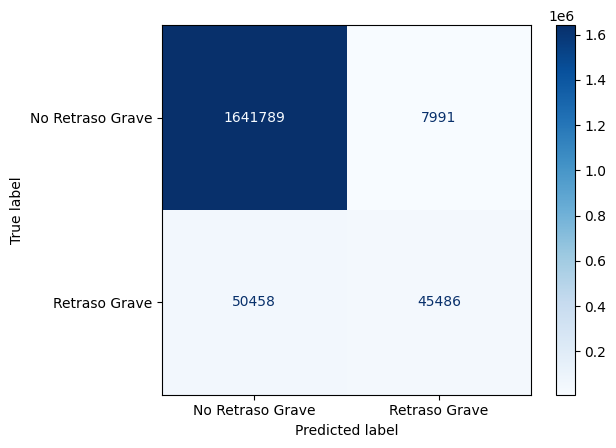

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Obtener probabilidades de la clase "Retraso Grave"
y_proba = ensemble.predict_proba(X_test)[:,1]

# 2. Calcular curvas de precisión y recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# 3. Calcular F1-score para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"Mejor umbral para maximizar F1: {best_threshold:.2f}")
print(f"Precisión: {precisions[best_index]:.2f}, Recall: {recalls[best_index]:.2f}, F1: {f1_scores[best_index]:.2f}")

# 4. Ajustar predicciones con el nuevo umbral
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# 5. Evaluar con matriz de confusión y reporte
labels = ["No Retraso Grave", "Retraso Grave"]
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")

print(classification_report(y_test, y_pred_adjusted, target_names=labels))